# Compute learning time for subjects of interest
Mar2025 \
author: Inês Laranjeira

In [ ]:
"""
IMPORTS
"""
import pandas as pd 
import numpy as np
import os

from one.api import ONE
one=ONE(mode='remote')

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Functions/'
functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/'
os.chdir(functions_path)
from one_functions_generic import training_time_mice, download_subjectTables
from data_processing import save_and_log


## Get mice names of interest

In [2]:
# Load trial clsuters
results_path = '/home/ines/repositories/representation_learning_variability/Models/Sub-trial/4_analyses/'
results_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Models/Sub-trial/4_analyses/'

trials_filename = str(results_path + 'cluster_per_trial_part_info03-12-2025')
trial_clusters = pd.read_parquet(trials_filename, engine='pyarrow')

In [3]:
mouse_names = trial_clusters['mouse_name'].unique()

## Compute training time for mice of interest

In [9]:
def training_time_mice(mouse_names, one):

    # Count training sessions until trained 1a or 1b; much faster than previous function; downloads data but does not concatenate in python
    training_times = pd.DataFrame(columns=['mouse_name', 'training_time'], index=range(len(mouse_names)))
    for m, mouse in enumerate(mouse_names):
        files = download_subjectTables(one, mouse, trials=True, training=True,
                            target_path=None, tag=None, overwrite=False, check_updates=True)
        trials, training = [pd.read_parquet(file) for file in files]
        training = training.reset_index()
        trained_date = training.loc[training['training_status'].isin(['trained 1b']), 'date']
        sessions = trials[['task_protocol', 'session_start_time', 'session']].drop_duplicates()
        training_sessions = sessions.loc[sessions['task_protocol'].str.contains('training')]
        training_time = np.sum(training_sessions['session_start_time']<np.min(trained_date))

        # Save
        training_times['mouse_name'][m] = mouse
        training_times['training_time'][m] = training_time
        print(m, mouse)
    
    return training_times

In [10]:
training_times_1b = training_time_mice(mouse_names, one)

0 SWC_038
1 SWC_053
2 CSHL045
3 UCLA014
4 ZFM-02373
5 PL015
6 ibl_witten_26
7 ZFM-01577
8 ZFM-01937
9 CSHL055
10 ibl_witten_29
11 CSHL053
12 PL017
13 CSHL060
14 SWC_065
15 NYU-47
16 SWC_052
17 UCLA034
18 UCLA006
19 ZFM-01935
20 KS084
21 KS096
22 CSH_ZAD_022
23 UCLA012
24 DY_016
25 DY_020
26 CSH_ZAD_025
27 CSHL058
28 UCLA037
29 ZFM-01936
30 CSHL047
31 DY_009
32 UCLA033
33 SWC_061
34 SWC_058
35 CSHL052
36 CSHL059
37 NYU-48
38 NR_0020
39 KS094
40 KS051
41 DY_014
42 CSHL049
43 SWC_043
44 DY_010
45 NYU-40
46 ibl_witten_25
47 NYU-45
48 DY_018
49 NYU-11
50 SWC_054
51 ZFM-01592
52 PL016
53 CSH_ZAD_011
54 CSH_ZAD_026
55 NYU-46
56 NYU-39
57 UCLA035
58 ZFM-02370
59 ZFM-02369
60 ibl_witten_27
61 DY_011
62 SWC_039
63 KS091
64 ZFM-02372
65 CSH_ZAD_019
66 SWC_060
67 CSH_ZAD_024
68 UCLA011
69 ZFM-01576
70 SWC_066
71 ZFM-02368
72 CSHL054
73 ibl_witten_20
74 UCLA017
75 UCLA005
76 UCLA036
77 DY_013
78 NR_0017
79 CSHL051
80 SWC_042


In [16]:
np.min(training_times_1b['training_time'])

5

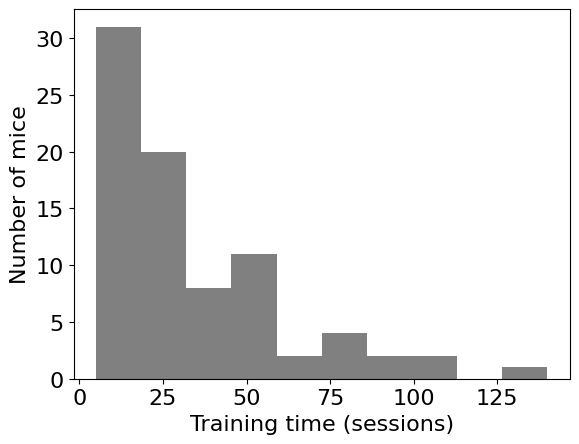

In [21]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.hist(training_times_1b['training_time'], color='grey')
plt.xlabel('Training time (sessions)')
plt.ylabel('Number of mice')
save_path =  '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Exported figures/COSYNE/'
plt.savefig(save_path+'histogram_training_time.svg', format="svg")

# Save

In [20]:
from datetime import datetime

now = datetime.now() # current date and time
date_time = now.strftime("%m-%d-%Y")
filename = "training_time_1b_"
file_to_save = training_times_1b.copy()
file_to_save.to_parquet(filename+date_time, compression='gzip')  

In [ ]:
file_to_save = training_times.copy()
filename = "training_time_"
save_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/DATA/'
file_format = 'parquet'
script_name = 'compute_learning_time.ipynb'
metadata = save_and_log(file_to_save, filename, file_format, save_path, script_name)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ines/repositories/representation_learning_variability/DATA/metadata_log.json'